In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil

In [29]:
video_path = f'/home/israel/Downloads/OAK/j9/05.08.2021_12.48.12_id:carlos1_walk:bk//color_video.mp4'

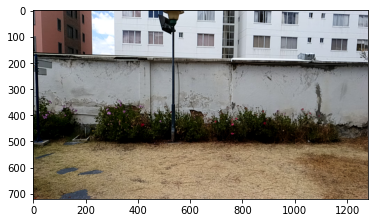

In [30]:
js = [2, 3, 5, 6, 9]
# for j in js:
cap = cv2.VideoCapture(video_path)
end = cap.get(cv2.CAP_PROP_FRAME_COUNT)
cap.set(cv2.CAP_PROP_POS_FRAMES, end-10)
ret, frame = cap.read()
frame = cv2.resize(frame, (1280, 720), cv2.INTER_AREA)
plt.imshow(frame[:,:,::-1])

In [31]:
save_name = (f"OAK-{video_path.split('/')[5]}.png")
save_name

'OAK-j9.png'

In [32]:
cv2.imwrite(save_name, frame)

True

In [3]:
def create_dir(folder, force=True, verbose=False):
    '''   Create a directory if it doesn't exist  '''
    try:
        os.makedirs(folder)
        if verbose: print('Directory {} created succesfully.'.format(folder))   
    except:
        if force:
            if verbose: print('{} already exists. Creating a new one'.format(folder))
            shutil.rmtree(folder)
            os.makedirs(folder)
        else:
            if verbose: print('{} already exists.'.format(folder))
            pass

In [15]:
dataset = '/home/israel/Downloads/OAK/'
newdataset = '/home/israel/Downloads/OAK2'
subjects = ['carlos1', 'jos', 'guille']
# subjects = ['carlos1']
walks = ['bk', 'nm', 'bg', 'cl']
files = ['color_video.h265', 'left_video.h264', 'right_video.h264']
mfiles = ['color_video.mp4', 'left_video.mp4', 'right_video.mp4']

views = sorted(os.listdir(dataset))
for view in views:
    recordings = os.listdir(os.path.join(dataset, view))
    for s, subject in enumerate(subjects):
        sub_path = os.path.join(newdataset, view, f'{str(s).zfill(3)}-{subject}')
        create_dir(sub_path, force=True)
        for w, walk in enumerate(walks):
            for rec in recordings:
                if subject in rec and f'walk:{walk}' in rec:
                    for file in files:
                        print(f'View:{view} Subject: {subject} walk: {walk} vid: {rec}')
                        codec_file = os.path.join(dataset, view, rec, file)
                        mp4_file = codec_file[:-4]+'mp4'
                        cmd = f'ffmpeg -framerate 30 -i {codec_file} -c copy {mp4_file}'
                        os.system(cmd)
                        if 'color' in file:
                            new_path = os.path.join(sub_path, f'{walk}.mp4' )
                            cmd = f'cp {mp4_file} {new_path}'
                            os.system(cmd)


View:j2 Subject: carlos1 walk: bk vid: 05.08.2021_12.48.12_id:carlos1_walk:bk
View:j2 Subject: carlos1 walk: bk vid: 05.08.2021_12.48.12_id:carlos1_walk:bk
View:j2 Subject: carlos1 walk: bk vid: 05.08.2021_12.48.12_id:carlos1_walk:bk
View:j2 Subject: carlos1 walk: nm vid: 05.08.2021_12.42.19_id:carlos1_walk:nm
View:j2 Subject: carlos1 walk: nm vid: 05.08.2021_12.42.19_id:carlos1_walk:nm
View:j2 Subject: carlos1 walk: nm vid: 05.08.2021_12.42.19_id:carlos1_walk:nm
View:j2 Subject: carlos1 walk: bg vid: 05.08.2021_12.46.19_id:carlos1_walk:bg
View:j2 Subject: carlos1 walk: bg vid: 05.08.2021_12.46.19_id:carlos1_walk:bg
View:j2 Subject: carlos1 walk: bg vid: 05.08.2021_12.46.19_id:carlos1_walk:bg
View:j2 Subject: carlos1 walk: cl vid: 05.08.2021_12.44.43_id:carlos1_walk:cl
View:j2 Subject: carlos1 walk: cl vid: 05.08.2021_12.44.43_id:carlos1_walk:cl
View:j2 Subject: carlos1 walk: cl vid: 05.08.2021_12.44.43_id:carlos1_walk:cl
View:j2 Subject: jos walk: bk vid: 05.08.2021_12.54.42_id:jos_wa

'cp /home/israel/Downloads/OAK/j2/05.08.2021_12.44.43_id:carlos1_walk:cl/right_video.mp4 /home/israel/Downloads/OAK2/j2/000-carlos1/cl.mp4'

'/home/israel/Downloads/OAK2/j2/000-carlos1/cl.mp4'

In [9]:
mp4_file

'/home/israel/Downloads/OAK/j2/05.08.2021_12.44.43_id:carlos1_walk:cl/right_video.mp4'